In [5]:
import numpy as np
import math
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
import os

# **Sobel and Gaussian filters**

sobel_x = np.array((
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]), dtype="int32")

sobel_y = np.array((
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]), dtype="int32")

gaussian = np.array(([1, 2, 1],[2, 4, 2], [1, 2, 1]), dtype="float64")/16

# **Convolution function from scratch**

def conv(img, kernel):
    img_height = img.shape[0]
    img_width = img.shape[1]
    kernel_h = kernel.shape[0]
    kernel_w = kernel.shape[1]
    # padding = floor(kernel_size/2)
    pad_h = (kernel_h//2)
    pad_w = (kernel_w//2)
    # pad((top,bottom), (left,right))
    pad = ((pad_h, pad_h), (pad_w, pad_w))

    img_padded = np.pad(img, pad, mode='constant', constant_values=0)
    output = np.zeros_like(img, dtype=np.float64)

    for i in range(img_height):
        for j in range(img_width):
            result = img_padded[i: i+kernel_h, j:j+kernel_w]
            output[i, j] = np.sum(result * kernel)
    return output


# **Harris Corner Detection from Scratch**

def HarrisCD(img, k=0.04, threshold=0.01):
    gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)
    # gray_arr = np.float32(gray)
    # Gaussian to smoothen out any noise
    img = conv(gray, gaussian)
    # Applying Sobel operator to find the x and y gradient values for every pixel in the grayscale image
    Ix = conv(img, sobel_x)
    Iy = conv(img, sobel_y)
    Ix_sq = np.square(Ix)
    Iy_sq = np.square(Iy)
    IxIy = Ix*Iy
    Ix_sq = conv(Ix_sq, gaussian)
    Iy_sq = conv(Iy_sq, gaussian)
    IxIy = conv(IxIy, gaussian)
    det = Ix_sq*Iy_sq - (IxIy)**2
    trace = Ix_sq + Iy_sq

    # C = det(M) - k*trace(M)^2
    output = det - k*(trace**2)
    corners = np.zeros_like(output)
    corners[output > threshold * output.max()] = 255
    return corners


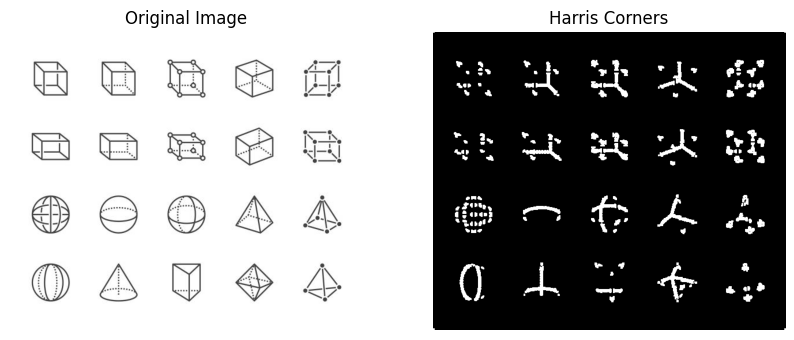

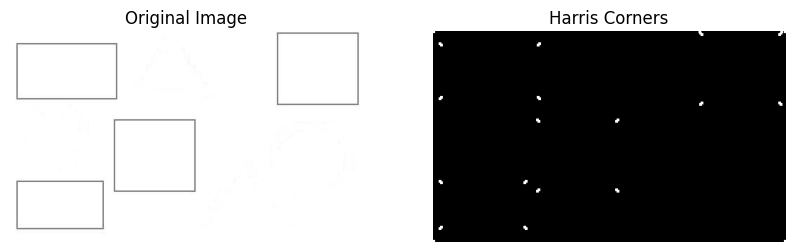

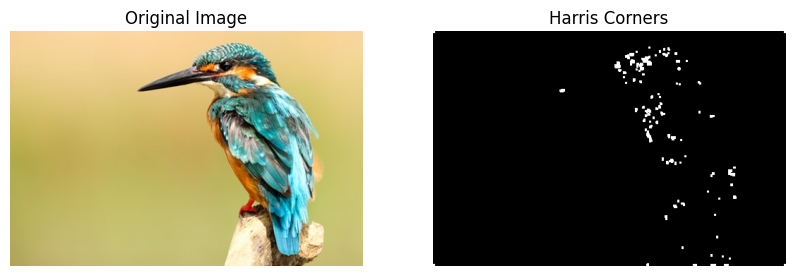

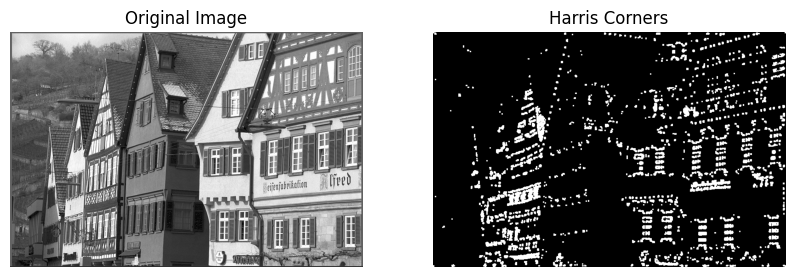

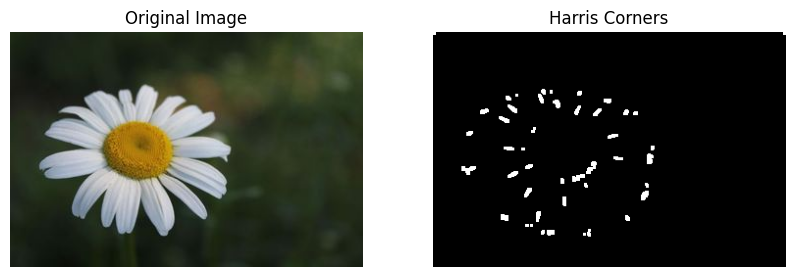

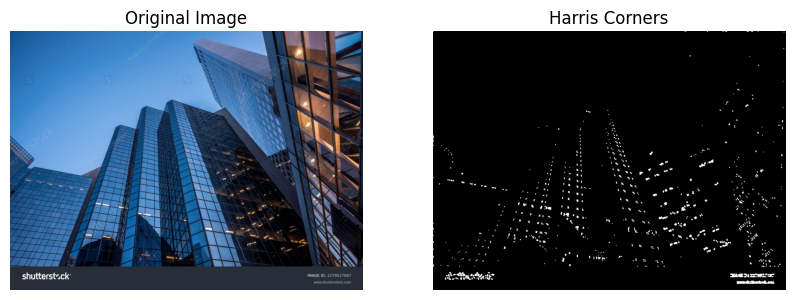

In [6]:
folder_path = "C:/Users/kanke/Downloads/Q1/Question 1"

# Iterate over files in the directory
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
        # Load image
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)
        
        # Make a copy of the image
        image_copy = np.copy(image)
        image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
        
        # Detect corners
        corners = HarrisCD(image, k=0.04, threshold=0.01)
        corners = cv2.dilate(corners, None)
        
        # Display the original image and the detected corners
        plt.figure(figsize=(10, 5))
        plt.subplot(121)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(122)
        plt.imshow(corners, cmap='gray')
        plt.title('Harris Corners')
        plt.axis('off')

        plt.show()

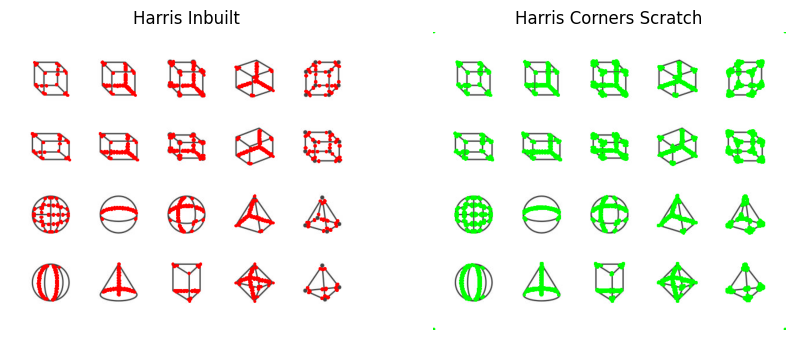

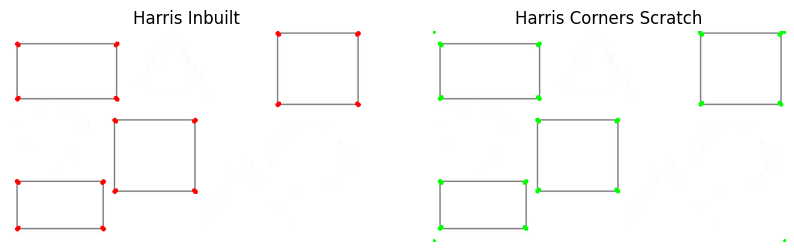

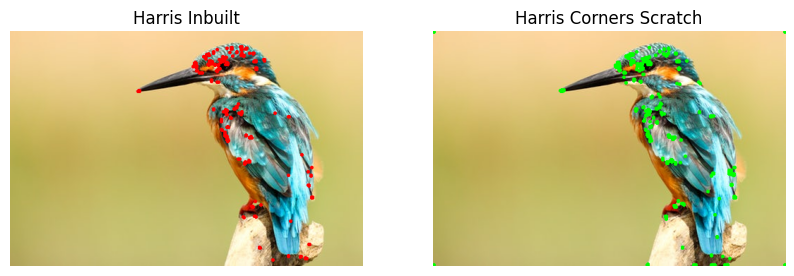

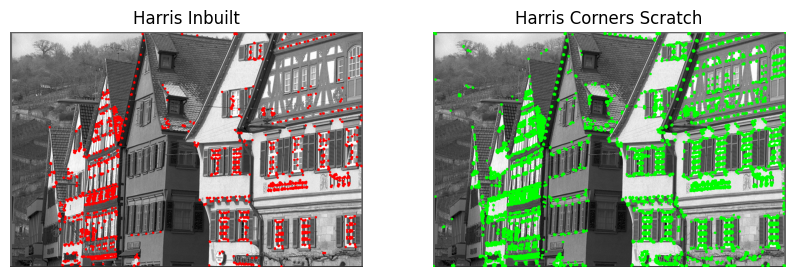

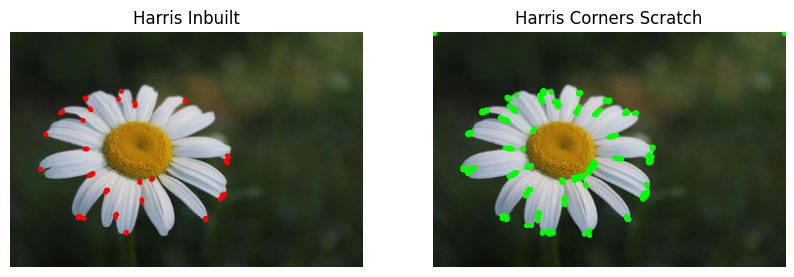

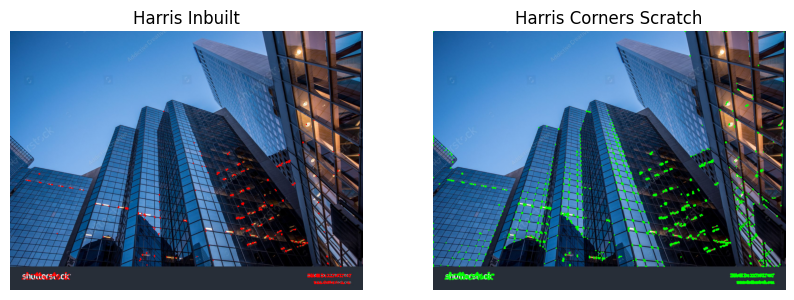

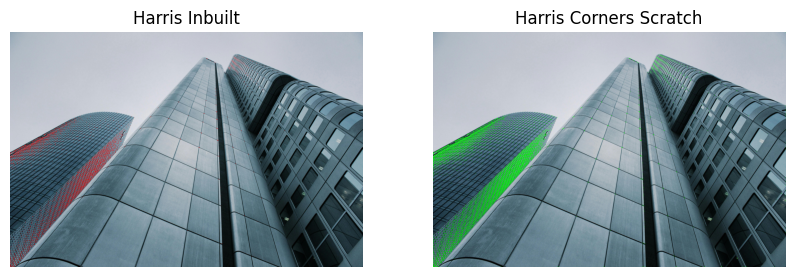

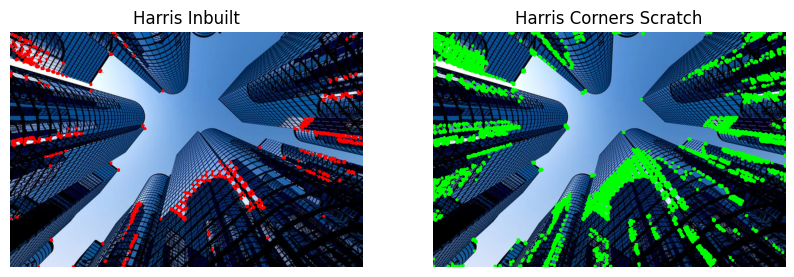

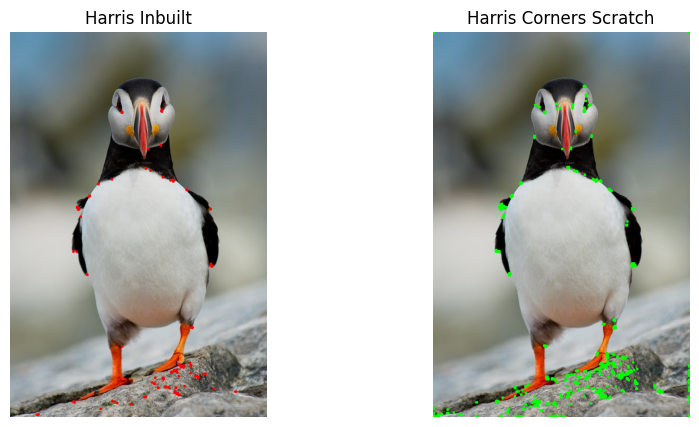

In [ ]:
folder_path = "./Question 1"
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
        # Load image
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)
        plt.figure(figsize=(10, 5))
        # Make a copy of the image
        image_copy = np.copy(image)
        # Change color to RGB (from BGR)
        image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

        # Convert image to grayscale
        gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)
        
        # Calculate Harris corners using inbuilt function
        c_d = cv2.cornerHarris(gray, 2, 3, 0.04)
        c_d = cv2.dilate(c_d, None)

        # Detect corners using custom Harris Corner Detection
        corners = HarrisCD(image, k=0.04, threshold=0.01)
        corners = cv2.dilate(corners,None)

        plt.subplot(121)
        corner_det = np.copy(image_copy)
        height = c_d.shape[0]
        width = c_d.shape[1]
        threshold = 0.1*c_d.max()

        for i in range(height):
            for j in range(width):
                if(c_d[i,j] > threshold):
                    # cv2.circle(image, center_coordinates, radius, color, thickness)
                    cv2.circle(corner_det, (j, i), 1, (255,0,0), 1)
        plt.imshow(corner_det)
        plt.title('Harris Inbuilt')
        plt.axis('off')

        plt.subplot(122)
        corner_det = np.copy(image_copy)
        height = corners.shape[0]
        width = corners.shape[1]
        threshold = 0.1*corners.max()

        for i in range(height):
            for j in range(width):
                if(corners[i,j] > threshold):
                    # cv2.circle(image, center_coordinates, radius, color, thickness)
                    cv2.circle(corner_det, (j, i), 1, (0,255,0), 1)
        plt.imshow(corner_det)
        plt.title('Harris Corners Scratch')
        plt.axis('off')

        plt.show()
